In [1]:
# Setup 
# Importación de librerías para Análisis y Visualización
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from supabase import create_client, Client
from dotenv import load_dotenv

# Configuración de Estilo para Gráficos
plt.style.use('ggplot')

# 1. Conexión Segura a (Supabase)
# Las claves se leen del archivo .env por seguridad
load_dotenv()
url = os.environ.get("SUPABASE_URL")
key = os.environ.get("SUPABASE_KEY")

try:
    supabase: Client = create_client(url, key)
    print("Conexión exitosa al (Supabase).")
    
    # 2. Extracción de Datos Agregados
    # Traemos solo el resumen procesado, no los millones de filas crudas
    response = supabase.table("monthly_tips").select("*").execute()
    df = pd.DataFrame(response.data)
    
    # Orden cronologico
    df = df.sort_values('month_label')
    print(f" Datos cargados: {len(df)} meses analizados.")
    
except Exception as e:
    print(f"Error de conexión: {e}")

Conexión exitosa al (Supabase).
 Datos cargados: 2 meses analizados.


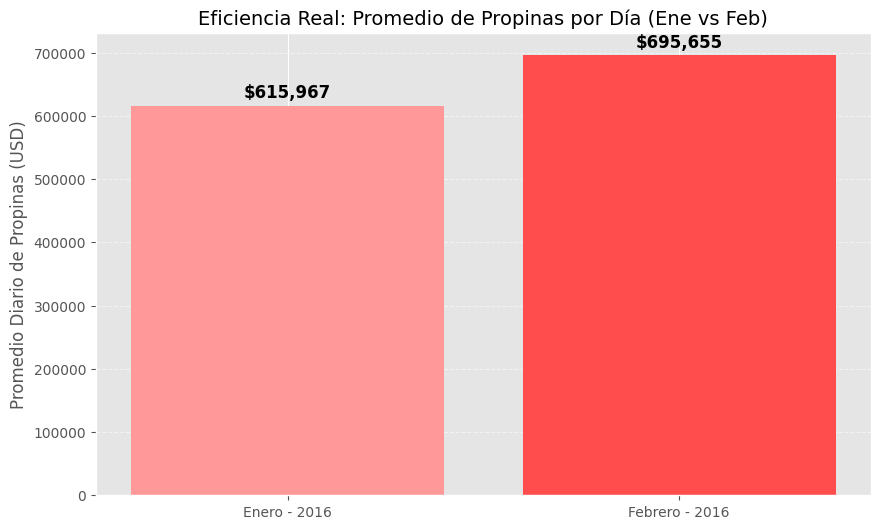

--- HALLAZGO DE NEGOCIO (COMPARACIÓN INICIAL) ---
Enero promedió $615,967 USD en propinas por día.
Febrero promedió $695,655 USD en propinas por día.
CONCLUSIÓN: Febrero fue más eficiente, generando +$79,688 diarios adicionales.


In [2]:
# [CELDA 2: KPI DE EFICIENCIA (COMPARACIÓN INICIAL)]

# 1. Preparación de Datos
# Definimos los días de cada mes (2016 fue bisiesto)
df['days_in_month'] = [31, 29] 

# Calculamos Eficiencia: 
# Fórmula: Total Propinas / Cantidad de Días
df['daily_efficiency'] = df['total_tip_amount'] / df['days_in_month']

# 2. Visualización: Eficiencia Diaria
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de Barras
# 
bars = ax.bar(df['month_label'], df['daily_efficiency'], color=['#ff9999', '#ff4d4d'])

# Formato
ax.set_title('Eficiencia Real: Promedio de Propinas por Día (Ene vs Feb)', fontsize=14)
ax.set_ylabel('Promedio Diario de Propinas (USD)')
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas de valor (Formato Moneda sin decimales para que se vea limpio)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.show()

--- DATOS PROCESADOS ---


,month_label,% Tarjeta,% Efectivo
0,Enero - 2016,66.2,33.8
1,Febrero - 2016,67.8,32.2


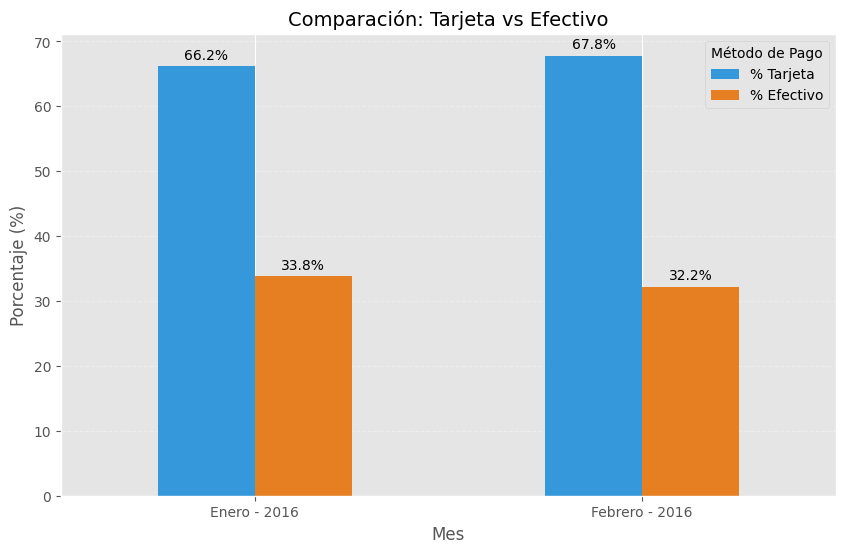

Observamos que el uso de Tarjeta (Azul) domina con un 67.0% aprox.


In [7]:
# ANÁLISIS DE MÉTODOS DE PAGO 

# 1. Extracción Manual de Datos (Más fácil de entender)
# Sacamos los datos del payment_type_summary' uno por uno
# '1' es Tarjeta, '2' es Efectivo
df['trips_card'] = df['payment_type_summary'].apply(lambda x: x.get('1', 0))
df['trips_cash'] = df['payment_type_summary'].apply(lambda x: x.get('2', 0))

# 2. Cálculo de Porcentajes (Matemática básica)
# Sumamos ambos para tener el total real
df['total_valid_trips'] = df['trips_card'] + df['trips_cash']

# Calculamos qué % representa cada uno
df['% Tarjeta'] = (df['trips_card'] / df['total_valid_trips'] * 100).round(1)
df['% Efectivo'] = (df['trips_cash'] / df['total_valid_trips'] * 100).round(1)

# Mostramos la tabla para verificar antes de graficar
print("--- DATOS PROCESADOS ---")
display(df[['month_label', '% Tarjeta', '% Efectivo']])

# 3. Visualización 
# Usamos el gráfico de barras directo de Pandas
ax = df.plot(x='month_label', 
             y=['% Tarjeta', '% Efectivo'], 
             kind='bar', 
             figsize=(10, 6),
             color=['#3498db', '#e67e22']) 

# Títulos 
plt.title('Comparación: Tarjeta vs Efectivo', fontsize=14)
plt.ylabel('Porcentaje (%)')
plt.xlabel('Mes')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Método de Pago")

# Colocamos los porcetages arriba de los graficos
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.show()


print(f"Observamos que el uso de Tarjeta (Azul) domina con un {df['% Tarjeta'].mean()}% aprox.")